In [1]:
import pandas as pd
import numpy as np
import scipy.stats

df = pd.read_csv('../Downloads/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,1,187,0,1
2,41,0,1,130,204,0,0,172,0,1
3,56,1,1,120,236,0,1,178,0,1
4,57,0,0,120,354,0,1,163,1,1


dof = (R-1)(C-1)

In [2]:
ct_o = df.groupby('sex')['target'].value_counts().unstack()
ct_o

target,0,1
sex,,
0,24,72
1,114,93


In [3]:
alpha = 0.01
dof = (2-1)*(2-1)
critical_value = 6.63

In [4]:
n_total = ct_o.sum().sum()
n_total

303

In [5]:
n_target0 = ct_o[0].sum()
n_target1 = ct_o[1].sum()
print(ct_target0, ct_target1)

NameError: name 'ct_target0' is not defined

In [6]:
p_target0 = n_target0 / n_total
p_target1 = n_target1 / n_total
print(p_target0, p_target1)

0.45544554455445546 0.5445544554455446


In [7]:
n_women = ct_o.iloc[0].sum()
n_men = ct_o.iloc[1].sum()
print(n_women, n_men)

96 207


In [8]:
f_e_target0_women = n_women * p_target0
f_e_target1_women = n_women * p_target1
print(f_e_target0_women, f_e_target1_women)

43.722772277227726 52.27722772277228


In [9]:
f_e_target0_men = n_men * p_target0
f_e_target1_men = n_men * p_target1
print(f_e_target0_men, f_e_target1_men)

94.27722772277228 112.72277227722773


In [10]:
ct_e = np.array([[f_e_target0_women, f_e_target1_women],
                [f_e_target0_men, f_e_target1_men]])
ct_e

array([[ 43.72277228,  52.27722772],
       [ 94.27722772, 112.72277228]])

In [11]:
ct_o[0].sum() * ct_o.iloc[0].sum() / n_total

43.722772277227726

In [12]:
ct_o

target,0,1
sex,,
0,24,72
1,114,93


In [13]:
chi_square = (np.power((ct_o - ct_e), 2) / ct_e).sum().sum()

In [14]:
print(critical_value, chi_square)
print(chi_square > critical_value)

6.63 23.914383914761984
True


In [15]:
scipy.stats.chi2_contingency(ct_o, correction=False)

(23.914383914761988,
 1.0071642033238865e-06,
 1,
 array([[ 43.72277228,  52.27722772],
        [ 94.27722772, 112.72277228]]))

In [16]:
sw = pd.read_csv('../Downloads/StarWars.csv', sep=';')
sw.head()

,respondentID,seen,fan,gender,age_group,income,loc,yoda,princess_leia_organa
0,3292879998,да,да,М,18-29,NaN,Южно-Атлантический,очень нравится,очень нравится
1,3292879538,нет,NaN,М,18-29,0 - 24.999,Юго-Западный центральный,NaN,NaN
2,3292765271,да,нет,М,18-29,0 - 24.999,Северо-Западный центральный,не знаю такого персонажа,нравится
3,3292763116,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,очень нравится,очень нравится
4,3292731220,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,нравится,нравится


In [17]:
table_s = sw.groupby('gender')['fan'].value_counts().unstack()
table_s

fan,да,нет
gender,,
Ж,238,159
М,303,120


In [18]:
scipy.stats.chi2_contingency(table_s, correction=False)

(12.449350493035466,
 0.00041813719910750865,
 1,
 array([[261.92317073, 135.07682927],
        [279.07682927, 143.92317073]]))

In [19]:
p_fan = table_s['да'].sum() / table_s.sum().sum()
round(p_fan, 2)

0.66

In [20]:
f_e_target

NameError: name 'f_e_target' is not defined

In [21]:
df = pd.read_csv('../Downloads/Running.csv')
df.head()

,Athlete,MileMinDur
0,0,0:06:21
1,0,0:07:00
2,0,0:12:44
3,1,0:06:25
4,1,0:07:24


In [22]:
alpha = 0.5

In [23]:
df['sec'] = df['MileMinDur'].apply(lambda x: int(x.split(':')[1]) * 60 + int(x.split(':')[2]))
df

,Athlete,MileMinDur,sec
0,0,0:06:21,381
1,0,0:07:00,420
2,0,0:12:44,764
3,1,0:06:25,385
4,1,0:07:24,444
...,...,...,...
387,0,0:10:59,659
388,0,0:12:55,775
389,0,0:08:33,513
390,1,0:08:26,506


In [24]:
athletes = df[df['Athlete'] == 1]['sec']
no_athletes = df[df['Athlete'] == 0]['sec']

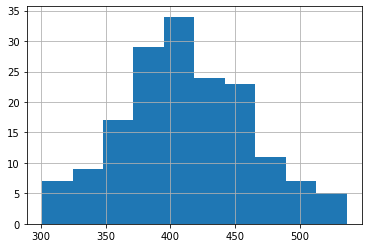

In [25]:
athletes.hist();

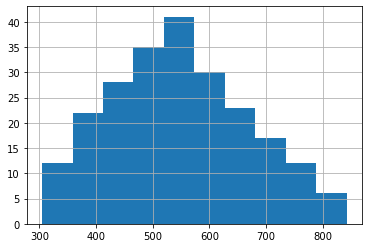

In [26]:
no_athletes.hist();

In [27]:
print(athletes.var(), no_athletes.var())

2444.858853596203 14802.27848574238


In [28]:
n_1 = len(athletes)
n_2 = len(no_athletes)
var_1 = athletes.var()
var_2 = no_athletes.var()

In [29]:
v1 = var_1 / n_1
v2 = var_2 / n_2
dof_welch = (v1 + v2) ** 2 /((v1 ** 2 / (n_1 - 1)) + v2 ** 2 / (n_2 - 1))
dof_welch

315.7925948972666

In [30]:
s_m1_m2 = np.sqrt(v1 + v2)

In [31]:
mean_1 = athletes.mean()
mean_2 = no_athletes.mean()

In [32]:
t = (mean_2 - mean_1) / s_m1_m2
t

15.048678915697742

In [33]:
scipy.stats.ttest_ind_from_stats(mean_1, np.sqrt(var_1), n_1,
                                mean_2, np.sqrt(var_2), n_2,
                                equal_var=False)

Ttest_indResult(statistic=-15.048678915697742, pvalue=5.824578890260176e-39)

In [34]:
scipy.stats.ttest_ind(athletes, no_athletes, equal_var=False)

Ttest_indResult(statistic=-15.048678915697742, pvalue=5.82457889026026e-39)

In [35]:
t_critical = 1.9667

In [36]:
CI_b = (mean_2 - mean_1) - t_critical * s_m1_m2
CI_t = (mean_2 - mean_1) + t_critical * s_m1_m2
print(CI_b, CI_t)

117.17311174188869 152.40392205702386


In [41]:
X = pd.DataFrame([23, 3, 11, 35, -3, -10])
Y = pd.DataFrame([29, 1, 20, 3, 0, 0])
scipy.stats.ttest_ind(X, Y, equal_var=False)

Ttest_indResult(statistic=array([0.11689002]), pvalue=array([0.90926149]))

In [42]:
X = pd.DataFrame([13, 0, 6, 9, -1, 0])
Y = pd.DataFrame([4, 1, 5, 1, 20, 0])
scipy.stats.ttest_ind(X, Y, equal_var=False)

Ttest_indResult(statistic=array([-0.17245225]), pvalue=array([0.86675389]))

In [47]:
X = pd.DataFrame([3, 2, 98, 34, 11, 2])
S = np.sqrt(np.power(X - X.mean(), 2).sum() / len(X) - 1)
t = (X.mean() - 7) / (S/ np.sqrt(len(X) - 1))
t

0    1.166603
dtype: float64

In [48]:
urba = pd.read_csv('../Downloads/UrbanizationCensusTract.csv')
urba.head()

,Unnamed: 0,statefips,state,gisjoin,lat_tract,long_tract,population,adj_radiuspop_5,urbanindex,log_pop
0,0,1,Alabama,G0100010020100,32.47718,-86.49007,1845,44076.0,10.69367,7.520235
1,1,1,Alabama,G0100010020200,32.47425,-86.47337,2172,43008.0,10.66914,7.683404
2,2,1,Alabama,G0100010020300,32.47543,-86.46019,3385,38987.0,10.57098,8.127109
3,3,1,Alabama,G0100010020400,32.47200,-86.44363,4267,43131.0,10.67200,8.358666
4,4,1,Alabama,G0100010020500,32.45883,-86.42266,9965,43131.0,10.67200,9.206834


In [61]:
X = urba[urba['state'] == 'Wyoming']['log_pop']
Y = urba[urba['state'] == 'South Dakota']['log_pop']
Sx = X.var()
Sy = Y.var()
print(Sy, Sx, Sx == Sy)

0.24738635408141207 0.18517126178551693 False


In [62]:
n_1 = len(X)
n_2 = len(Y)
v1 = Sx / n_1
v2 = Sy / n_2
dof_welch = (v1 + v2) ** 2 /((v1 ** 2 / (n_1 - 1)) + v2 ** 2 / (n_2 - 1))
dof_welch

304.74376993186024

In [68]:
s_m1_m2 = np.sqrt(v1 + v2)
s_m1_m2

0.050429546274961226

In [69]:
X.mean() - Y.mean()

0.17812507657673038

In [70]:
scipy.stats.ttest_ind(X, Y, equal_var=False)

Ttest_indResult(statistic=3.5321570336075356, pvalue=0.00047596931710874944)

In [71]:
CI_b = (X.mean() - Y.mean()) - 2.5920 * s_m1_m2
CI_t = (X.mean() - Y.mean()) + 2.5920 * s_m1_m2
print(CI_b, CI_t)

0.04741169263203088 0.3088384605214299
